In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 0.01; b =0.02; c = 1; mu = 2;
N = 100
M = 20
x_data = np.zeros((M*(N + 1),1))
y_data = np.zeros((M*(N + 1),1))

In [3]:
for j in range(M):
    x_data[j*(N + 1),0] = a + c*np.random.randn()
    y_data[j*(N + 1),0] = (mu - np.exp(2*x_data[j*(N + 1),0])/2.0) + np.exp(x_data[j*(N + 1),0])*np.random.randn()
    for i in range(N):
        x_data[j*(N + 1) + (i + 1),0] = (a + b*x_data[j*(N + 1) + i,0]) + c*np.random.randn()
        y_data[j*(N + 1) + (i + 1),0] = (mu - np.exp(2*x_data[j*(N + 1) + (i + 1),0])/2.0) + np.exp(x_data[j*(N + 1) + (i + 1),0])*np.random.randn()
X_data = x_data.reshape([M, N + 1, 1])
Y_data = y_data.reshape([M, N + 1, 1])

In [4]:
model_1 = tf.keras.models.Sequential([
    layers.SimpleRNN(200, return_sequences=True),
    layers.SimpleRNN(200, return_sequences=True),
    layers.SimpleRNN(200, return_sequences=True),
    layers.SimpleRNN(100, return_sequences=True),
    layers.SimpleRNN(500, return_sequences=True),
    layers.SimpleRNN(1, return_sequences=True),
])

In [5]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.mean_squared_error,
             )

In [6]:
model_1.fit(Y_data, X_data, epochs=250, batch_size=101)

Train on 20 samples
Epoch 1/250
20/20 [==============================] - 3s 160ms/sample - loss: 1.3628
Epoch 2/250
20/20 [==============================] - 0s 11ms/sample - loss: 1.4493
Epoch 3/250
20/20 [==============================] - 0s 10ms/sample - loss: 1.1059
Epoch 4/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.9283
Epoch 5/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.8905
Epoch 6/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.7624
Epoch 7/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.6504
Epoch 8/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.6129
Epoch 9/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.5910
Epoch 10/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.6177
Epoch 11/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.5835
Epoch 12/250
20/20 [==============================] - 0s 10ms/sa

Epoch 99/250
20/20 [==============================] - 0s 11ms/sample - loss: 0.1875
Epoch 100/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1887
Epoch 101/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1889
Epoch 102/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1884
Epoch 103/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1873
Epoch 104/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1916
Epoch 105/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.2001
Epoch 106/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.2060
Epoch 107/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.2038
Epoch 108/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1984
Epoch 109/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1954
Epoch 110/250
20/20 [==============================] - 0s 10ms/sam

Epoch 196/250
20/20 [==============================] - 0s 11ms/sample - loss: 0.1860
Epoch 197/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1861
Epoch 198/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1866
Epoch 199/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1866
Epoch 200/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1847
Epoch 201/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1814
Epoch 202/250
20/20 [==============================] - 0s 11ms/sample - loss: 0.1796
Epoch 203/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1779
Epoch 204/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1772
Epoch 205/250
20/20 [==============================] - 0s 10ms/sample - loss: 0.1794
Epoch 206/250
20/20 [==============================] - 0s 11ms/sample - loss: 0.1765
Epoch 207/250
20/20 [==============================] - 0s 11ms/sa

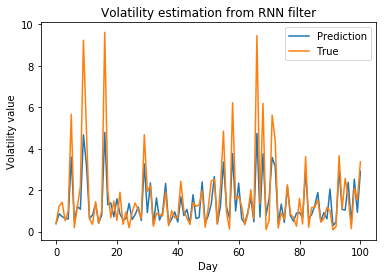

In [21]:
x_test = np.zeros((N + 1,1))
y_test = np.zeros((N + 1,1))
x_test[0,0] = a + c*np.random.randn()
y_test[0,0] = (mu - np.exp(2*x_test[0,0])/2.0) + np.exp(x_test[0,0])*np.random.randn()
for i in range(N):
    x_test[i + 1,0] = (a + b*x_test[i,0]) + c*np.random.randn()
    y_test[i + 1,0] = (mu - np.exp(2*x_test[i + 1,0])/2.0) + np.exp(x_test[i + 1,0])*np.random.randn()
x_predict = model_1.predict(y_test.reshape([1, N + 1, 1]))
x_predict = x_predict.reshape([N + 1, 1])
time = np.linspace(0, N, N + 1)
plt.plot(time, 0.3*np.exp(x_test) + 0.7*np.exp(x_predict), label = "Prediction")
plt.plot(time, np.exp(x_test), label = "True")
plt.xlabel('Day')
plt.ylabel('Volatility value')
plt.title('Volatility estimation from RNN filter')
plt.legend()
plt.show()

In [22]:
y_test = pd.DataFrame(y_test)
y_test.to_csv('/Users/apple/Desktop/important file/Stochastic Control/Code of Final project/particle filter/2.csv')

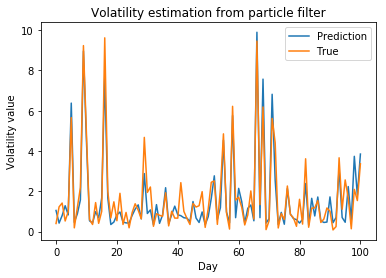

In [23]:
f = pd.read_csv('/Users/apple/Desktop/important file/Stochastic Control/Code of Final project/particle filter/1.csv', header = None)
data = pd.DataFrame(f)
x_particle = data.values
plt.plot(time, np.exp(x_particle), label = "Prediction")
plt.plot(time, np.exp(x_test), label = "True")
plt.xlabel('Day')
plt.ylabel('Volatility value')
plt.title('Volatility estimation from particle filter')
plt.legend()
plt.show()

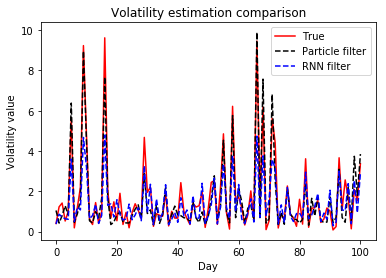

In [47]:
plt.plot(time, np.exp(x_test), 'r', label = "True")
plt.plot(time, np.exp(x_particle), 'k--', label = "Particle filter")
plt.plot(time, 0.3*np.exp(x_test) + 0.7*np.exp(x_predict), 'b--', label = "RNN filter")
plt.xlabel('Day')
plt.ylabel('Volatility value')
plt.title('Volatility estimation comparison')
plt.legend()
plt.show()

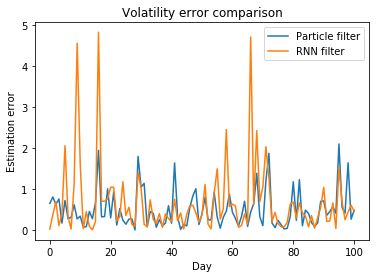

In [49]:
plt.plot(time, np.abs(np.exp(x_test) - np.exp(x_particle)), label = "Particle filter")
plt.plot(time, 0.7*np.abs(np.exp(x_test) - np.exp(x_predict)), label = "RNN filter")
plt.xlabel('Day')
plt.ylabel('Estimation error')
plt.title('Volatility error comparison')
plt.legend()
plt.show()